# Atividade - Semana 14 - Previsão (parte 2)

Esta é atividade semanal sugerida. Você deverá preenchê-la e enviá-la dentro do prazo (até o fechamento da semana corrente).

###Questão 1

A partir dos dados das seguintes ações bancárias: `BBAS3.SA`, `BBDC4.SA`, `ITUB4.SA`, `SANB11.SA`(as mesmas utilizadas no material) de **jan/2023** a **set/2023**:

> a) Ajuste a base de dados para que seja compatível com o pacote `Prophet`.
>
> b) Defina o período de previsão como **30 dias úteis**. Assim, separe a base de dados e duas partes: `treino` e `teste`.
>
> c) Estime o modelo e realize previsões para as ações `ITUB4.SA` para os dados de `treino`e `teste` utilizando o pacote `Prophet`. Use as demais informações como informações adicionais.
>
> d) Visualize o resultado da previsão utlizando um gráfico de série temporal.

In [16]:
# Questao 1

# Carregando pacotes
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Definindo abreviação (ticker)
bancos_tickers = ["BBAS3.SA",   # Banco do Brasil
                  "BBDC4.SA",   # Bradesco
                  "ITUB4.SA",   # Itau
                  "SANB11.SA"]  # Santander

# Obtendo dados
df_bancos = yf.download(bancos_tickers,       # Ações
                        start="2023-01-01",   # Data inicial AAAA-MM-DD
                        end="2023-09-01",     # Data final AAAA-MM-DD
                        progress = False).dropna()

# Selecionando as colunas `Adj Close` pela posição
df_bancos = df_bancos.iloc[:, [0, 1, 2, 3]]

# Renomeando colunas
df_bancos.columns = bancos_tickers
df_bancos

,BBAS3.SA,BBDC4.SA,ITUB4.SA,SANB11.SA
Date,,,,
2023-01-02,30.951464,13.827187,23.614153,26.022142
2023-01-03,30.374500,13.141015,23.122391,25.909124
2023-01-04,30.765350,13.178560,23.189886,26.436535
2023-01-05,32.170544,13.751134,23.913067,26.860350
2023-01-06,32.617226,14.135978,24.327688,27.557287
...,...,...,...,...
2023-08-25,46.598976,14.791296,26.562708,26.347536
2023-08-28,47.939453,15.270043,27.462637,26.761217
2023-08-29,48.207550,15.449573,27.897766,27.490084


In [17]:
# Questao 1
# Letra a)
df_bancos = df_bancos.reset_index()
df_bancos = df_bancos[['Date', 'ITUB4.SA']]
df_bancos.rename(columns={'Date': 'ds', 'ITUB4.SA': 'y'}, inplace=True)
df_bancos

,ds,y
0,2023-01-02,23.614153
1,2023-01-03,23.122391
2,2023-01-04,23.189886
3,2023-01-05,23.913067
4,2023-01-06,24.327688
...,...,...
162,2023-08-25,26.562708
163,2023-08-28,27.462637
164,2023-08-29,27.897766
165,2023-08-30,27.363743


In [18]:
# Questao 1
# Letra b)
# Numero de períodos que quero fazer previsão
periodo = 30

# DataFrame de treino
df_treino = df_bancos.iloc[:-periodo]

# DataFrame de teste
df_teste = df_bancos.iloc[-periodo:]

In [19]:
# Questao 1
# Letra c)
# Criando o modelo
modelo = Prophet()

# Estimando o modelo
modelo.fit(df_treino)

'''👉 Agora, vamos fazer previsões!'''
# Previsões para dados de treino (passado)
previsoes_treino = modelo.predict(df_treino)

# Previsões para dados de teste (futuro)
previsoes_teste = modelo.predict(df_teste)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplikden4b/6mbt92fc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplikden4b/8ysi590w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79684', 'data', 'file=/tmp/tmplikden4b/6mbt92fc.json', 'init=/tmp/tmplikden4b/8ysi590w.json', 'output', 'file=/tmp/tmplikden4b/prophet_modeljwh7ugjn/prophet_model-20231031012042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:20:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:20:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


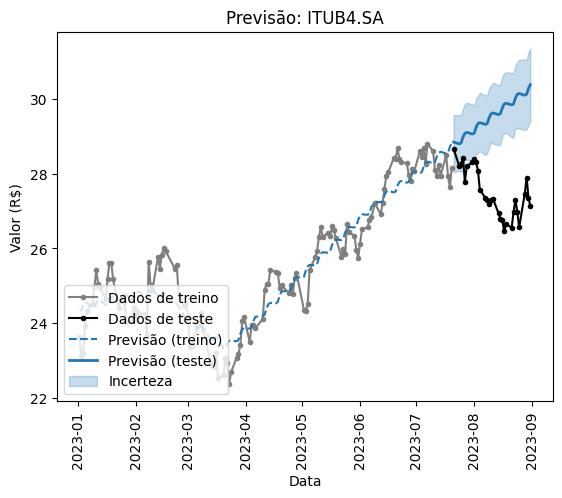

In [21]:
# Questao 1
# Letra d)
'''Visualizando o resultado:'''
# Dados de treino
plt.plot(df_treino['ds'], df_treino['y'], '.-',
         color='tab:grey', label='Dados de treino')

# Dados de teste
plt.plot(df_teste['ds'], df_teste['y'], '.-',
         color='black', label='Dados de teste')

# Previsão (treino)
plt.plot(df_treino['ds'], previsoes_treino['yhat'], '--',
         color='tab:blue', label='Previsão (treino)')

# Previsão (teste)
plt.plot(df_teste['ds'], previsoes_teste['yhat'],
         color='tab:blue', label='Previsão (teste)', linewidth=2.0)

# Incerteza (teste)
plt.fill_between(df_teste['ds'], previsoes_teste['yhat_lower'],
                 previsoes_teste['yhat_upper'],
                 color='tab:blue', alpha=0.25, label='Incerteza')

# Rótulos
plt.title('Previsão: ITUB4.SA')
plt.xlabel('Data')
plt.ylabel('Valor (R$)')

# Legenda
plt.legend(loc='lower left') # local: esquerda inferior

# Rotacionando a data no eixo horizontal 90 graus
plt.xticks(rotation=90)

plt.show()






###Questão 2

A partir dos dados das seguintes ações americanas: `AAPL`, `AMZN`, `BRK-B`, `GOOG`, `JNJ`, `META`, `MSFT`, `TSLA`, `UNH`, `V` (as mesmas utilizadas na Atividade da Semana 12) de **jan/2023** a **set/2023**:

> a) Calcule o retorno percentual destas ações.
>
> b) Ajuste a base de dados para que seja compatível com o pacote `Prophet`. Condidere como objetivo (`y`) a ação que contém maior retorno percentual médio considerando todo o período disponível.
>
> c) Defina o período de previsão como **90 dias úteis**. Assim, separe a base de dados e duas partes: `treino` e `teste`.
>
> d) Estime o modelo e realize previsões para as ações de maior retorno para os dados de `treino`e `teste` utilizando o pacote `Prophet`. Use as demais informações como informações adicionais.
>
> e) Visualize o resultado da previsão utlizando um gráfico de série temporal.

In [23]:
# Questao 2

# Carregando pacotes
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Tickers
tickers = ["AAPL", "AMZN", "BRK-B", "GOOG", "JNJ",
           "META", "MSFT", "TSLA", "UNH", "V" ]

# Obtendo dados
df = yf.download(tickers,                # Ação
                 start="2023-01-01",     # Data inicial AAAA-MM-DD
                 end="2023-09-01",       # Data final AAAA-MM-DD
                 progress=False).iloc[:, list(range(10))]
                 # Selecionando as 10 primeiras colunas

# Renomeando colunas
df.columns = tickers
df

,AAPL,AMZN,BRK-B,GOOG,JNJ,META,MSFT,TSLA,UNH,V
Date,,,,,,,,,,
2023-01-03,124.538666,85.820000,309.910004,89.699997,174.326996,124.739998,237.956329,108.099998,512.690674,206.194107
2023-01-04,125.823189,85.139999,314.549988,88.709999,176.224945,127.370003,227.547348,113.639999,498.712860,211.384018
2023-01-05,124.488876,83.120003,312.899994,86.769997,174.923767,126.940002,220.803360,110.339996,484.339630,209.892654
2023-01-06,129.069321,86.080002,318.690002,88.160004,176.342331,130.020004,223.405609,113.059998,484.379181,216.494370
2023-01-09,129.597061,87.360001,315.529999,88.800003,171.773575,129.470001,225.580750,119.769997,484.438477,217.339478
...,...,...,...,...,...,...,...,...,...,...
2023-08-25,178.610001,133.259995,355.929993,130.690002,166.250000,285.500000,322.980011,238.589996,487.223267,242.570007
2023-08-28,180.190002,133.139999,355.549988,131.789993,164.289993,290.260010,323.700012,238.820007,489.374908,243.830002
2023-08-29,184.119995,134.910004,358.290009,135.490005,164.309998,297.989990,328.410004,257.179993,490.918884,245.339996


In [50]:
# Questao 2
# Letra a)
retorno = df.pct_change()
retorno

,AAPL,AMZN,BRK-B,GOOG,JNJ,META,MSFT,TSLA,UNH,V
Date,,,,,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,0.010314,-0.007924,0.014972,-0.011037,0.010887,0.021084,-0.043743,0.051249,-0.027264,0.025170
2023-01-05,-0.010605,-0.023726,-0.005246,-0.021869,-0.007384,-0.003376,-0.029638,-0.029039,-0.028821,-0.007055
2023-01-06,0.036794,0.035611,0.018504,0.016019,0.008110,0.024263,0.011785,0.024651,0.000082,0.031453
2023-01-09,0.004089,0.014870,-0.009916,0.007260,-0.025908,-0.004230,0.009736,0.059349,0.000122,0.003904
...,...,...,...,...,...,...,...,...,...,...
2023-08-25,0.012643,0.010771,0.004601,0.002070,0.014338,-0.004359,0.009407,0.037167,0.002090,0.012945
2023-08-28,0.008846,-0.000900,-0.001068,0.008417,-0.011790,0.016673,0.002229,0.000964,0.004416,0.005194
2023-08-29,0.021810,0.013294,0.007706,0.028075,0.000122,0.026631,0.014550,0.076878,0.003155,0.006193


In [55]:
# Questao 2
# Letra b)
retorno_medio = retorno.mean()
retorno_medio
#A de maior retorno medio é a TSLA
df_prophet = pd.DataFrame({'ds': df.index, 'y': retorno['TSLA']})
df_prophet = df_prophet.reset_index()
df_prophet = df_prophet.iloc[1:,[1,2]]
df_prophet

,ds,y
1,2023-01-04,0.051249
2,2023-01-05,-0.029039
3,2023-01-06,0.024651
4,2023-01-09,0.059349
5,2023-01-10,-0.007681
...,...,...
162,2023-08-25,0.037167
163,2023-08-28,0.000964
164,2023-08-29,0.076878
165,2023-08-30,-0.001089


In [56]:
# Questao 2
# Letra c)
# Numero de períodos que quero fazer previsão
periodo = 90

# DataFrame de treino
df_treino = df_prophet.iloc[:-periodo]

# DataFrame de teste
df_teste = df_prophet.iloc[-periodo:]

In [57]:
# Questao 2
# Letra d)
# Criando o modelo
modelo = Prophet()

# Estimando o modelo
modelo.fit(df_treino)

# Previsões para dados de treino (passado)
previsoes_treino = modelo.predict(df_treino)

# Previsões para dados de teste (futuro)
previsoes_teste = modelo.predict(df_teste)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplikden4b/y6h2y0w5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplikden4b/rc9_qgo1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52625', 'data', 'file=/tmp/tmplikden4b/y6h2y0w5.json', 'init=/tmp/tmplikden4b/rc9_qgo1.json', 'output', 'file=/tmp/tmplikden4b/prophet_modelin_z7uaq/prophet_model-20231031013903.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:39:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:39:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


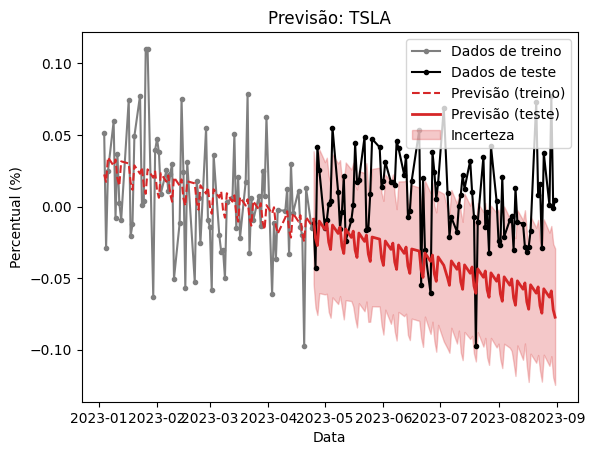

In [59]:
# Questao 2
# Letra e)
'''Visualizando o resultado:'''
# Dados de treino
plt.plot(df_treino['ds'], df_treino['y'], '.-',
         color='tab:grey', label='Dados de treino')

# Dados de teste
plt.plot(df_teste['ds'], df_teste['y'], '.-',
         color='black', label='Dados de teste')

# Previsão (treino)
plt.plot(df_treino['ds'], previsoes_treino['yhat'], '--',
         color='tab:red', label='Previsão (treino)')

# Previsão (teste)
plt.plot(df_teste['ds'], previsoes_teste['yhat'],
         color='tab:red', label='Previsão (teste)', linewidth=2.0)

# Incerteza (teste)
plt.fill_between(df_teste['ds'], previsoes_teste['yhat_lower'],
                 previsoes_teste['yhat_upper'],
                 color='tab:red', alpha=0.25, label='Incerteza')

# Rótulos
plt.title('Previsão: TSLA')
plt.xlabel('Data')
plt.ylabel('Percentual (%)')

# Legenda
plt.legend(loc='upper right') # local: direita superior

plt.show()